# Import libraries

In [1]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Input, average, concatenate
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l1, l2
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import model_to_dot
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import glob

from IPython.display import SVG

from sklearn.metrics import confusion_matrix
import itertools

import winsound

Using TensorFlow backend.


In [20]:
# Variables
n_classes = 7
classes=np.array(('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'))

l2_lambda = 0.0001

img_size = 128

n_filters1 = 8
n_filters2 = 16
n_filters3 = 32
n_filters4 = 64
n_filters5 = 128
n_filters5 = 256


# n_train_ins = 32298
# n_test_ins = 3589

note_for_model = 'complex_model_wo_fc_for_fer2013_improving(3)_train_only'

# train_path = './data/fer2013/train_and_test1'
train_path = './data/fer2013/train'
val_path = './data/fer2013/test1'
val_path2 = './data/fer2013/test2'

final_model_path = note_for_model + '.h5'
his_path = note_for_model + '.pickle'

# Functions
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Define model: a model in karas is a sequence of layers!

In [21]:
print(' > Declaring simple CNN...', end='')

outs = [] # The list of ensemble outputs

img_input = Input(shape=(img_size, img_size, 1), name='input')
x = BatchNormalization(name='batch_norm_0')(img_input)

x = Conv2D(n_filters1, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_1_1')(x)
x = BatchNormalization(name='batch_norm_1_1')(x)

x = Conv2D(n_filters1, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_1_2')(x)
x = BatchNormalization(name='batch_norm_1_2')(x)

##
x = MaxPooling2D(pool_size=(2, 2), name='pool_1')(x)
x = Dropout(0.5, name='drop_1')(x)
##

x = Conv2D(n_filters2, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_2_1')(x)
x = BatchNormalization(name='batch_norm_2_1')(x)

x = Conv2D(n_filters2, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_2_2')(x)
x = BatchNormalization(name='batch_norm_2_2')(x)

x = Conv2D(n_filters2, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_2_3')(x)
x = BatchNormalization(name='batch_norm_2_3')(x)

##
x = MaxPooling2D(pool_size=(2, 2), name='pool_2')(x)
x = Dropout(0.5, name='drop_2')(x)
##

# ================================================== #
out1 = Flatten(name='flatten_2')(x)
out1 = Dense(256, activation='relu',
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(l2_lambda),
           name='dense_2')(out1)
# ================================================== #

x = Conv2D(n_filters3, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_3_1')(x)
x = BatchNormalization(name='batch_norm_3_1')(x)

x = Conv2D(n_filters3, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_3_2')(x)
x = BatchNormalization(name='batch_norm_3_2')(x)

x = Conv2D(n_filters3, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_3_3')(x)
x = BatchNormalization(name='batch_norm_3_3')(x)

x = Conv2D(n_filters3, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_3_4')(x)
x = BatchNormalization(name='batch_norm_3_4')(x)

##
x = MaxPooling2D(pool_size=(2, 2), name='pool_3')(x)
x = Dropout(0.5, name='drop_3')(x)
##

# ================================================== #
out2 = Flatten(name='flatten_3')(x)
out2 = Dense(256, activation='relu',
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(l2_lambda),
           name='dense_3')(out2)
# ================================================== #

x = Conv2D(n_filters4, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_4_1')(x)
x = BatchNormalization(name='batch_norm_4_1')(x)

x = Conv2D(n_filters4, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_4_2')(x)
x = BatchNormalization(name='batch_norm_4_2')(x)

x = Conv2D(n_filters4, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_4_3')(x)
x = BatchNormalization(name='batch_norm_4_3')(x)

x = Conv2D(n_filters4, (3, 3), activation='relu',
                      kernel_initializer='he_uniform', 
                      kernel_regularizer=l2(l2_lambda), name='conv_4_4')(x)
x = BatchNormalization(name='batch_norm_4_4')(x)

##
x = MaxPooling2D(pool_size=(2, 2), name='pool_4')(x)
x = Dropout(0.5, name='drop_4')(x)
##

# ================================================== #
out3 = Flatten(name='flatten_4')(x)
out3 = Dense(256, activation='relu',
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(l2_lambda),
           name='dense_4')(out3)
# ================================================== #

outs = concatenate([out1, out2, out3], axis=-1, name='ensemble')
# outs = concatenate([out2, out3], axis=-1, name='ensemble')

base_model = Model(img_input, outs, name='simple_cnn')


predictions = Dense(n_classes, activation='softmax',
                    kernel_initializer='glorot_uniform', 
                    kernel_regularizer=l2(l2_lambda), name='final_7_way_softmax')(outs)

model = Model(inputs=base_model.input, outputs=predictions, name='ensemble_cnn_for_fer')
# ================================================== #

print('done.')

 > Declaring simple CNN...done.


In [22]:
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input (InputLayer)               (None, 128, 128, 1)   0                                            
____________________________________________________________________________________________________
batch_norm_0 (BatchNormalization (None, 128, 128, 1)   4           input[0][0]                      
____________________________________________________________________________________________________
conv_1_1 (Conv2D)                (None, 126, 126, 8)   80          batch_norm_0[0][0]               
____________________________________________________________________________________________________
batch_norm_1_1 (BatchNormalizati (None, 126, 126, 8)   32          conv_1_1[0][0]                   
___________________________________________________________________________________________

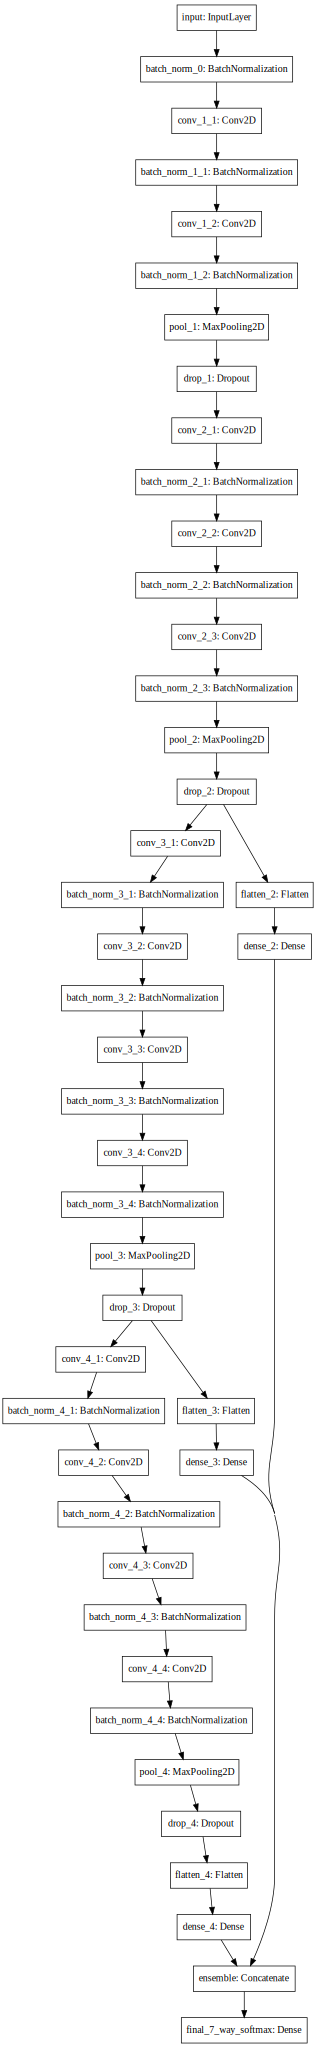

In [23]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Compile model

In [24]:
opt = RMSprop(lr=1e-4, decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

***
# Fit model

In [ ]:
batch_size = 512
n_epoches = 10000
early_stop_after = 100

In [ ]:
# fer2013 ------------------------------------------------
train_datagen = ImageDataGenerator(width_shift_range=0.25, height_shift_range=0.25, horizontal_flip=True,
#                                    featurewise_center=True, featurewise_std_normalization=True,
#                                    samplewise_center=True, samplewise_std_normalization=True,
                                   rotation_range=45)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=True)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

n_train_ins = train_generator.samples
n_test_ins = val_generator.samples

early_stopping1 = EarlyStopping(monitor='val_loss', patience=early_stop_after, verbose=1)
early_stopping2 = EarlyStopping(monitor='val_acc', patience=early_stop_after, verbose=1)

checkpointer1 = ModelCheckpoint(monitor='val_loss', filepath='checkpoints/loss_' + note_for_model + '_model.{epoch:05d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5', verbose=1, save_best_only=True)
checkpointer2 = ModelCheckpoint(monitor='val_acc', filepath='checkpoints/acc_' + note_for_model + '_model.{epoch:05d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5', verbose=1, save_best_only=True)

history = model.fit_generator(generator=train_generator, steps_per_epoch=n_train_ins/batch_size,
                    epochs=n_epoches, verbose=1,
                    validation_data=val_generator, validation_steps=n_test_ins/batch_size,
#                     callbacks=[checkpointer1, checkpointer2, early_stopping2])
                    callbacks=[checkpointer1, early_stopping1, checkpointer2])
#                     callbacks=[checkpointer1, early_stopping1, checkpointer2, early_stopping2])
# history = model.fit_generator(generator=train_generator, steps_per_epoch=n_train_ins,
#                     epochs=n_epoches, verbose=1,
#                     validation_data=val_generator, validation_steps=n_test_ins/batch_size,
#                     callbacks=[checkpointer1, early_stopping1, checkpointer2, early_stopping2])

# winsound.PlaySound('new_message.wav', winsound.SND_ALIAS)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Epoch 1/10000
56/56 [============================>.] - ETA: 0s - loss: 3.4615 - acc: 0.1867
 [+] Epoch 00000: val_loss improved from inf to 2.43017
     Saving model to checkpoints/loss_complex_model_wo_fc_for_fer2013_improving(3)_train_only_model.00000-3.4611-0.1867-2.4302-0.1552.hdf5

 [+] Epoch 00000: val_acc improved from -inf to 0.15520
     Saving model to checkpoints/acc_complex_model_wo_fc_for_fer2013_improving(3)_train_only_model.00000-3.4611-0.1867-2.4302-0.1552.hdf5
57/56 [==============================] - 50s - loss: 3.4567 - acc: 0.1872 - val_loss: 2.4302 - val_acc: 0.1552
Epoch 2/10000
56/56 [============================>.] - ETA: 0s - loss: 2.6481 - acc: 0.1933
 [+] Epoch 00001: val_loss improved from 2.43017 to 2.40733
     Saving model to checkpoints/loss_complex_model_wo_fc_for_fer2013_improving(3)_train_only_model.00001-2.6480-0.1932-2.4073-0.1967.hdf5

 [+] Epoch 00001: val_acc impr

In [ ]:
winsound.PlaySound('new_message.wav', winsound.SND_ALIAS)

***
# Save trained model and evaluate

In [170]:
# print('> saving the lastest weights...', end='')
# model.save_weights(final_model_path)
# print('done.')

# load the best weight
# Get the latest weight file based on last modified time
lowf = glob.glob('./checkpoints/*.hdf5')
BEST_WEIGHT_FILE = max(lowf, key=os.path.getmtime)
# BEST_WEIGHT_FILE = './checkpoints/acc_simple_model_wo_fc_for_fer2013_model.00227-0.7593-0.8175-1.3605-0.7010.hdf5'

print('> loading trained model from ' + BEST_WEIGHT_FILE + '...', end='')
model.load_weights(BEST_WEIGHT_FILE)
print('done.')

print('> saving base model (resnet) based on the best checkpoint...', end='')
BEST_BASE_FILE = './nontop_models/' + os.path.basename(os.path.splitext(BEST_WEIGHT_FILE)[0]) + '_nontop.h5'
base_model.save_weights(BEST_BASE_FILE)
print('done.')

# FER2013 ------------------------------------------------
print('> evaluating loaded model with FER2013...' + val_path)
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

n_test_ins = val_generator.samples

res = model.evaluate_generator(generator=val_generator, steps=n_test_ins/batch_size)
print(res[1])

# FER2013 ------------------------------------------------
print('> evaluating loaded model with FER2013...' + val_path2)
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_path2,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

n_test_ins = val_generator.samples

res = model.evaluate_generator(generator=val_generator, steps=n_test_ins/batch_size)
print(res[1])

# FER2013 ------------------------------------------------
print('> evaluating loaded model with FER2013...' + train_path)
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

n_test_ins = val_generator.samples

res = model.evaluate_generator(generator=val_generator, steps=n_test_ins/batch_size)
print(res[1])

> loading trained model from ./checkpoints\acc_complex_model_wo_fc_for_fer2013_improving(3)_model.00331-0.5056-0.9213-1.9837-0.7016.hdf5...done.
> saving base model (resnet) based on the best checkpoint...done.
> evaluating loaded model with FER2013..../data/fer2013/test1
Found 3589 images belonging to 7 classes.
0.987183059348
> evaluating loaded model with FER2013..../data/fer2013/test2
Found 3589 images belonging to 7 classes.
0.701588186141
> evaluating loaded model with FER2013..../data/fer2013/train
Found 28709 images belonging to 7 classes.
0.990630115992


***
# Training statistic

In [136]:
if not 'history' in locals():
    file = open(his_path,'rb')
    history_ = pickle.load(file)
else:
    history_ = history.history

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


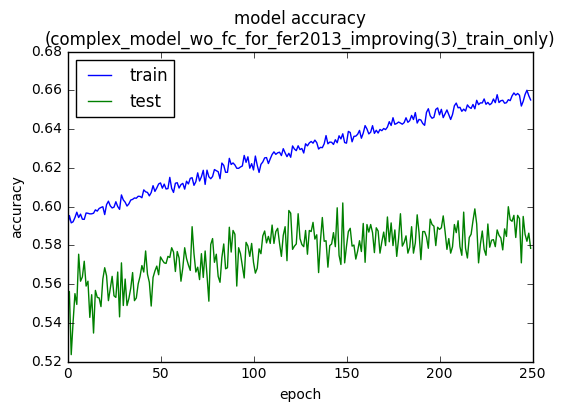

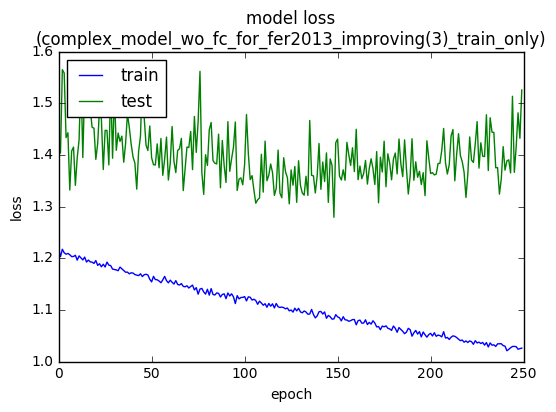

In [137]:
# list all data in history
print(history_.keys())
# summarize history for accuracy
plt.plot(history_['acc'])
plt.plot(history_['val_acc'])
plt.title('model accuracy\n(' + note_for_model + ')')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_['loss'])
plt.plot(history_['val_loss'])
plt.title('model loss\n(' + note_for_model + ')')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

with open(his_path, 'wb') as f:
    pickle.dump(history_, f)

***
# Confusion matrix

In [128]:
# fer2013 ------------------------------------------------
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

n_train_ins = train_generator.samples
n_test_ins = val_generator.samples

y_pred_training_ = model.predict_generator(generator=train_generator, steps=n_train_ins/batch_size, verbose=1)
y_pred_ = model.predict_generator(generator=val_generator, steps=n_test_ins/batch_size, verbose=1)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
14/14 [============================>.] - ETA: 0s

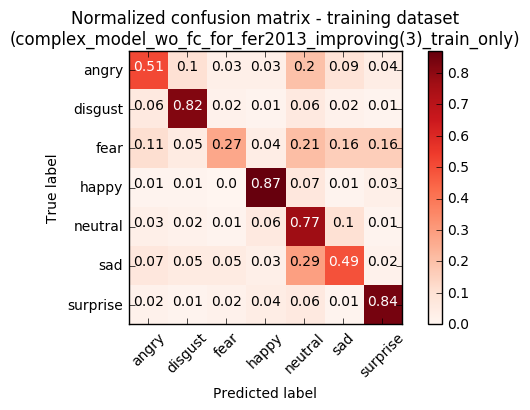

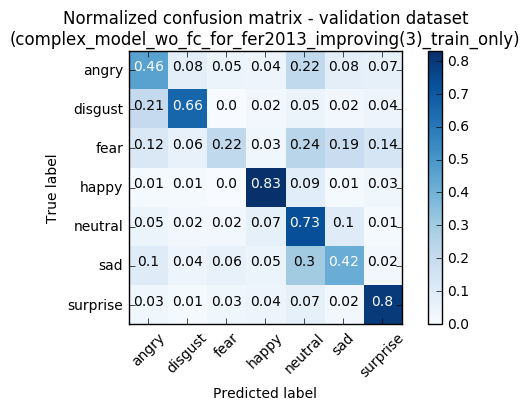

0.60183895235441631

In [129]:
y_pred_training = np.argmax(y_pred_training_, axis=1)
y_pred = np.argmax(y_pred_, axis=1)

plot_confusion_matrix(y_test=train_generator.classes, y_pred=y_pred_training,
                      classes=classes,
                      normalize=True,
                      title='Normalized confusion matrix - training dataset\n(' + note_for_model + ')',
                      cmap=plt.cm.Reds)

plot_confusion_matrix(y_test=val_generator.classes, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      title='Normalized confusion matrix - validation dataset\n(' + note_for_model + ')')

# plot_confusion_matrix(y_test=val_generator.classes, y_pred=y_pred,
#                       classes=classes,
#                       normalize=False,
#                       title='Unnormalized confusion matrix - validation dataset')

np.sum(y_pred == val_generator.classes)/len(val_generator.classes)

# Continue training classifier

In [ ]:
print(' > Declaring simple CNN...', end='')

weights_path = './nontop_models/acc_complex_model_wo_fc_for_fer2013_improving(3)_model.00331-0.5056-0.9213-1.9837-0.7016_nontop.h5'
base_model.load_weights(weights_path)

op = base_model.output

dropout_rate = 0.75

#############################################################
#### Freeze base model's layers (timedistributed layers) ####
#############################################################
for layer in base_model.layers:
    if hasattr(layer, 'layer'):
        layer.layer.trainable = False
    layer.trainable = False

xx = Dense(512, activation='relu',
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(l2_lambda),
           name='dense_1')(op)
xx = BatchNormalization(name='dense_batch_norm_1')(xx)
xx = Dropout(dropout_rate, name='dense_drop_1')(xx)

xx = Dense(512, activation='relu',
           kernel_initializer='he_uniform',
           kernel_regularizer=l2(l2_lambda),
           name='dense_2')(xx)
xx = BatchNormalization(name='dense_batch_norm_2')(xx)
xx = Dropout(dropout_rate, name='dense_drop_2')(xx)

predictions = Dense(n_classes, activation='softmax',
                    kernel_initializer='glorot_uniform', 
                    kernel_regularizer=l2(l2_lambda), name='final_7_way_softmax')(xx)

model2 = Model(inputs=base_model.input, outputs=predictions, name='ensemble_cnn_for_fer')
# ================================================== #

print('done.')

In [ ]:
model2.summary()

In [ ]:
SVG(model_to_dot(model2).create(prog='dot', format='svg'))

In [ ]:
opt = RMSprop(lr=1e-4, decay=1e-5)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
note_for_model = 'complex_model_wo_fc_for_fer2013_improving(3)_retrain_top_layer'

batch_size = 72
n_epoches = 10000
early_stop_after = 100

# fer2013 ------------------------------------------------
train_datagen = ImageDataGenerator(width_shift_range=0.25, height_shift_range=0.25, horizontal_flip=True,
#                                    featurewise_center=True, featurewise_std_normalization=True,
#                                    samplewise_center=True, samplewise_std_normalization=True,
                                   rotation_range=45)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=True)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

n_train_ins = train_generator.samples
n_test_ins = val_generator.samples

early_stopping1 = EarlyStopping(monitor='val_loss', patience=early_stop_after, verbose=1)
early_stopping2 = EarlyStopping(monitor='val_acc', patience=early_stop_after, verbose=1)

checkpointer1 = ModelCheckpoint(monitor='val_loss', filepath='checkpoints/loss_' + note_for_model + '_model.{epoch:05d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5', verbose=1, save_best_only=True)
checkpointer2 = ModelCheckpoint(monitor='val_acc', filepath='checkpoints/acc_' + note_for_model + '_model.{epoch:05d}-{loss:.4f}-{acc:.4f}-{val_loss:.4f}-{val_acc:.4f}.hdf5', verbose=1, save_best_only=True)

history = model2.fit_generator(generator=train_generator, steps_per_epoch=n_train_ins/batch_size,
                    epochs=n_epoches, verbose=1,
                    validation_data=val_generator, validation_steps=n_test_ins/batch_size,
#                     callbacks=[checkpointer1, checkpointer2, early_stopping2])
                    callbacks=[checkpointer1, early_stopping1, checkpointer2])
#                     callbacks=[checkpointer1, early_stopping1, checkpointer2, early_stopping2])
# history = model.fit_generator(generator=train_generator, steps_per_epoch=n_train_ins,
#                     epochs=n_epoches, verbose=1,
#                     validation_data=val_generator, validation_steps=n_test_ins/batch_size,
#                     callbacks=[checkpointer1, early_stopping1, checkpointer2, early_stopping2])

# winsound.PlaySound('new_message.wav', winsound.SND_ALIAS)

In [ ]:
history_ = history.history

In [ ]:
# list all data in history
print(history_.keys())
# summarize history for accuracy
plt.plot(history_['acc'])
plt.plot(history_['val_acc'])
plt.title('model accuracy\n(' + note_for_model + ')')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_['loss'])
plt.plot(history_['val_loss'])
plt.title('model loss\n(' + note_for_model + ')')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

with open(his_path, 'wb') as f:
    pickle.dump(history_, f)

In [ ]:
# fer2013 ------------------------------------------------
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    shuffle=False)

n_train_ins = train_generator.samples
n_test_ins = val_generator.samples

y_pred_training_ = model2.predict_generator(generator=train_generator, steps=n_train_ins/batch_size, verbose=1)
y_pred_ = model2.predict_generator(generator=val_generator, steps=n_test_ins/batch_size, verbose=1)

In [ ]:
y_pred_training = np.argmax(y_pred_training_, axis=1)
y_pred = np.argmax(y_pred_, axis=1)

plot_confusion_matrix(y_test=train_generator.classes, y_pred=y_pred_training,
                      classes=classes,
                      normalize=True,
                      title='Normalized confusion matrix - training dataset\n(' + note_for_model + ')',
                      cmap=plt.cm.Reds)

plot_confusion_matrix(y_test=val_generator.classes, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      title='Normalized confusion matrix - validation dataset\n(' + note_for_model + ')')

# plot_confusion_matrix(y_test=val_generator.classes, y_pred=y_pred,
#                       classes=classes,
#                       normalize=False,
#                       title='Unnormalized confusion matrix - validation dataset')

np.sum(y_pred == val_generator.classes)/len(val_generator.classes)